In [1]:
# load relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.cluster import KMeans
from scipy.spatial import distance

In [2]:
# load the data
file_path = '/Users/ericjiang/Desktop/msci719_assignment/ass6/'
file_name = 'data_1.csv'
df = pd.read_csv(file_path + file_name)

In [3]:
df.head()

,Item#,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,...,hour 16,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total sales
0,1,Polos&Tees,Morning,0.14,0.18,0.15,0.07,0.00,0.00,0.15,...,0.00,0.0,0.0,0.0,0.00,0.01,0.01,0.00,0.00,91
1,2,Polos&Tees,Morning,0.14,0.13,0.07,0.06,0.11,0.10,0.08,...,0.00,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.00,80
2,3,Polos&Tees,Afternoon,0.30,0.16,0.06,0.10,0.05,0.02,0.02,...,0.00,0.0,0.0,0.0,0.00,0.00,0.02,0.00,0.02,91
3,4,Skirts,Morning,0.26,0.12,0.07,0.04,0.04,0.04,0.03,...,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.02,171
4,5,Polos&Tees,Afternoon,0.22,0.11,0.00,0.08,0.00,0.05,0.00,...,0.01,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,85


In [4]:
# examine the number of categories for the two categorical variables
print(df['Department'].unique())
print(df['Event Part of the day'].unique())

['Polos&Tees' 'Skirts']
['Morning' 'Afternoon']


In [5]:
# encode the categorical variables into binary variables
df['Department'] = df['Department'].replace({'Polos&Tees':1, 'Skirts':0})
df['Event Part of the day'] = df['Event Part of the day'].replace({'Morning':1, 'Afternoon':0})

In [6]:
df.head()

,Item#,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,...,hour 16,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total sales
0,1,1,1,0.14,0.18,0.15,0.07,0.00,0.00,0.15,...,0.00,0.0,0.0,0.0,0.00,0.01,0.01,0.00,0.00,91
1,2,1,1,0.14,0.13,0.07,0.06,0.11,0.10,0.08,...,0.00,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.00,80
2,3,1,0,0.30,0.16,0.06,0.10,0.05,0.02,0.02,...,0.00,0.0,0.0,0.0,0.00,0.00,0.02,0.00,0.02,91
3,4,0,1,0.26,0.12,0.07,0.04,0.04,0.04,0.03,...,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.02,171
4,5,1,0,0.22,0.11,0.00,0.08,0.00,0.05,0.00,...,0.01,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,85


In [7]:
# check null values, data types and so on
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
Item#                    1000 non-null int64
Department               1000 non-null int64
Event Part of the day    1000 non-null int64
hour 1                   1000 non-null float64
hour 2                   1000 non-null float64
hour 3                   1000 non-null float64
hour 4                   1000 non-null float64
hour 5                   1000 non-null float64
hour 6                   1000 non-null float64
hour 7                   1000 non-null float64
hour 8                   1000 non-null float64
hour 9                   1000 non-null float64
hour 10                  1000 non-null float64
hour 11                  1000 non-null float64
hour 12                  1000 non-null float64
hour 13                  1000 non-null float64
hour 14                  1000 non-null float64
hour 15                  1000 non-null float64
hour 16                  1000 non-null float64
hour 17

In [8]:
# calculate the percentage of each item sold in 24 hrs
df['percentage_sold'] = df.iloc[:, 3:27].sum(axis = 1)

In [9]:
# examine whether there are some abnormal values
df[df['percentage_sold']>1.00]

,Item#,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,...,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total sales,percentage_sold
12,13,1,1,0.31,0.18,0.10,0.06,0.03,0.01,0.08,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,87,1.01
17,18,1,0,0.40,0.18,0.03,0.17,0.12,0.00,0.01,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,58,1.01
38,39,0,0,0.29,0.13,0.08,0.07,0.06,0.04,0.04,...,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.02,88,1.01
68,69,0,0,0.31,0.18,0.10,0.06,0.03,0.01,0.08,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,80,1.01
73,74,0,1,0.40,0.18,0.03,0.17,0.12,0.00,0.01,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,89,1.01
94,95,1,1,0.29,0.13,0.08,0.07,0.06,0.04,0.04,...,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.02,57,1.01
124,125,1,0,0.31,0.18,0.10,0.06,0.03,0.01,0.08,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,82,1.01
129,130,0,0,0.40,0.18,0.03,0.17,0.12,0.00,0.01,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,73,1.01
150,151,0,0,0.29,0.13,0.08,0.07,0.06,0.04,0.04,...,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.02,58,1.01
180,181,1,0,0.31,0.18,0.10,0.06,0.03,0.01,0.08,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,91,1.01


In [10]:
# after looking into the descriptive info, we accept 1.01 as it is (equal to situations 1.00)
df['percentage_sold'].describe()

count    1000.000000
mean        0.935200
std         0.077856
min         0.640000
25%         0.900000
50%         0.960000
75%         1.000000
max         1.010000
Name: percentage_sold, dtype: float64

In [11]:
# find the stock status for each item ('Not stocked out' or 'Stocked out')
result = []
for i in range(len(df)):
    if df.iloc[i]['percentage_sold']>=1.00 and df.iloc[i]['hour 24']==0.00:
        result.append('Stocked out')
    else:
        result.append('Not stocked out')
df['stock_status'] = result

In [12]:
df.head(10)

,Item#,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,...,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total sales,percentage_sold,stock_status
0,1,1,1,0.14,0.18,0.15,0.07,0.00,0.00,0.15,...,0.00,0.0,0.00,0.01,0.01,0.00,0.00,91,0.99,Not stocked out
1,2,1,1,0.14,0.13,0.07,0.06,0.11,0.10,0.08,...,0.00,0.0,0.01,0.00,0.00,0.00,0.00,80,0.90,Not stocked out
2,3,1,0,0.30,0.16,0.06,0.10,0.05,0.02,0.02,...,0.00,0.0,0.00,0.00,0.02,0.00,0.02,91,0.90,Not stocked out
3,4,0,1,0.26,0.12,0.07,0.04,0.04,0.04,0.03,...,0.00,0.0,0.00,0.00,0.01,0.01,0.02,171,0.85,Not stocked out
4,5,1,0,0.22,0.11,0.00,0.08,0.00,0.05,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,85,0.64,Not stocked out
5,6,1,1,0.34,0.09,0.13,0.03,0.06,0.03,0.01,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,88,0.93,Not stocked out
6,7,1,1,0.32,0.17,0.11,0.08,0.05,0.03,0.03,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,51,0.97,Not stocked out
7,8,1,1,0.21,0.14,0.06,0.09,0.04,0.10,0.02,...,0.00,0.0,0.00,0.00,0.00,0.00,0.03,63,0.84,Not stocked out
8,9,1,0,0.52,0.16,0.00,0.11,0.06,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.00,71,0.96,Not stocked out
9,10,1,1,0.38,0.15,0.11,0.05,0.06,0.04,0.02,...,0.03,0.0,0.00,0.00,0.00,0.00,0.00,98,1.00,Stocked out


In [13]:
# calculate the cumulative percentage sold till a specific time for each item
df_cumul = np.cumsum(df.iloc[:, 3:27],axis=1)

In [14]:
df_cumul.head()

,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,hour 8,hour 9,hour 10,...,hour 15,hour 16,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24
0,0.14,0.32,0.47,0.54,0.54,0.54,0.69,0.78,0.81,0.84,...,0.97,0.97,0.97,0.97,0.97,0.97,0.98,0.99,0.99,0.99
1,0.14,0.27,0.34,0.40,0.51,0.61,0.69,0.69,0.69,0.77,...,0.89,0.89,0.89,0.89,0.89,0.90,0.90,0.90,0.90,0.90
2,0.30,0.46,0.52,0.62,0.67,0.69,0.71,0.73,0.75,0.78,...,0.86,0.86,0.86,0.86,0.86,0.86,0.86,0.88,0.88,0.90
3,0.26,0.38,0.45,0.49,0.53,0.57,0.60,0.64,0.67,0.67,...,0.81,0.81,0.81,0.81,0.81,0.81,0.81,0.82,0.83,0.85
4,0.22,0.33,0.33,0.41,0.41,0.46,0.46,0.51,0.51,0.53,...,0.63,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64


In [15]:
# find the time when the cumulative percentage reaches maximum
result = []
for i in range(len(df_cumul)):
    max_percent = max(df_cumul.iloc[i,:])
    for j in range(24):
        if df_cumul.iloc[i][j]<max_percent:
            continue
        if df_cumul.iloc[i][j]==max_percent:
            result.append(j+1)
            break
df_cumul['max_time'] = result

In [16]:
# combine the 'max_time' information into the main dataset
df_max_time = pd.DataFrame(df_cumul['max_time'])
df_combine = df.merge(df_max_time,how='inner',left_index=True,right_index=True)

In [17]:
df_combine.head(20)

,Item#,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,...,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total sales,percentage_sold,stock_status,max_time
0,1,1,1,0.14,0.18,0.15,0.07,0.00,0.00,0.15,...,0.00,0.00,0.01,0.01,0.00,0.00,91,0.99,Not stocked out,22
1,2,1,1,0.14,0.13,0.07,0.06,0.11,0.10,0.08,...,0.00,0.01,0.00,0.00,0.00,0.00,80,0.90,Not stocked out,20
2,3,1,0,0.30,0.16,0.06,0.10,0.05,0.02,0.02,...,0.00,0.00,0.00,0.02,0.00,0.02,91,0.90,Not stocked out,24
3,4,0,1,0.26,0.12,0.07,0.04,0.04,0.04,0.03,...,0.00,0.00,0.00,0.01,0.01,0.02,171,0.85,Not stocked out,24
4,5,1,0,0.22,0.11,0.00,0.08,0.00,0.05,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,85,0.64,Not stocked out,16
5,6,1,1,0.34,0.09,0.13,0.03,0.06,0.03,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,88,0.93,Not stocked out,17
6,7,1,1,0.32,0.17,0.11,0.08,0.05,0.03,0.03,...,0.00,0.00,0.00,0.00,0.00,0.00,51,0.97,Not stocked out,17
7,8,1,1,0.21,0.14,0.06,0.09,0.04,0.10,0.02,...,0.00,0.00,0.00,0.00,0.00,0.03,63,0.84,Not stocked out,24
8,9,1,0,0.52,0.16,0.00,0.11,0.06,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,71,0.96,Not stocked out,10
9,10,1,1,0.38,0.15,0.11,0.05,0.06,0.04,0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,98,1.00,Stocked out,18


In [18]:
# calculate the true demand for 'Not stocked out' items
df_in_stock = df_combine[df_combine['stock_status']=='Not stocked out']
df_demand_in_stock = df_in_stock[['Item#','Total sales']]
df_demand_in_stock = df_demand_in_stock.rename(columns={'Total sales': 'True demand'})

In [19]:
df_demand_in_stock.head()

,Item#,True demand
0,1,91
1,2,80
2,3,91
3,4,171
4,5,85


In [20]:
# prepare the dataset used for clustering
df_clustering = df_combine[df_combine['stock_status']=='Not stocked out']\
                .drop(['Item#','Total sales','percentage_sold','stock_status','max_time'],axis=1)\
                .reset_index().drop('index',axis=1)

In [21]:
df_clustering.head()

,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,hour 8,...,hour 15,hour 16,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24
0,1,1,0.14,0.18,0.15,0.07,0.00,0.00,0.15,0.09,...,0.00,0.00,0.0,0.0,0.0,0.00,0.01,0.01,0.00,0.00
1,1,1,0.14,0.13,0.07,0.06,0.11,0.10,0.08,0.00,...,0.00,0.00,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.00
2,1,0,0.30,0.16,0.06,0.10,0.05,0.02,0.02,0.02,...,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.02,0.00,0.02
3,0,1,0.26,0.12,0.07,0.04,0.04,0.04,0.03,0.04,...,0.01,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.02
4,1,0,0.22,0.11,0.00,0.08,0.00,0.05,0.00,0.05,...,0.02,0.01,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00


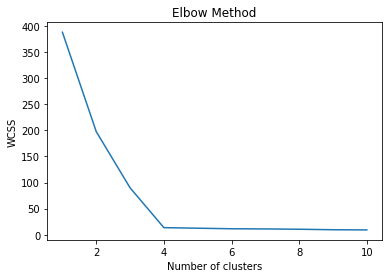

In [22]:
# use 'Elbow Method' to determine the optimal k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# implement k-means clustering with k=4
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_clustering)

KMeans(init='random', n_clusters=4, random_state=0)

In [24]:
# get the cluster centroids
kmeans.cluster_centers_

array([[1.00000000e+00, 3.33066907e-16, 2.56842105e-01, 1.38516746e-01,
        7.39234450e-02, 6.62200957e-02, 5.44019139e-02, 4.34449761e-02,
        4.04306220e-02, 3.85645933e-02, 2.28708134e-02, 2.72727273e-02,
        2.58851675e-02, 2.36842105e-02, 2.10047847e-02, 1.36363636e-02,
        8.99521531e-03, 1.10526316e-02, 6.88995215e-03, 4.92822967e-03,
        4.11483254e-03, 5.35885167e-03, 8.37320574e-03, 6.98564593e-03,
        4.78468900e-03, 6.07655502e-03],
       [1.00000000e+00, 1.00000000e+00, 2.55776892e-01, 1.37569721e-01,
        6.83266932e-02, 7.08366534e-02, 5.43027888e-02, 4.46215139e-02,
        3.92430279e-02, 3.98406375e-02, 2.38247012e-02, 2.68525896e-02,
        2.60159363e-02, 2.17928287e-02, 2.04382470e-02, 1.31075697e-02,
        9.68127490e-03, 1.25896414e-02, 7.37051793e-03, 4.78087649e-03,
        4.50199203e-03, 5.89641434e-03, 8.28685259e-03, 8.00796813e-03,
        4.22310757e-03, 6.65338645e-03],
       [1.11022302e-16, 1.00000000e+00, 2.66890244e-01

In [25]:
# store it for further use
centroid = kmeans.cluster_centers_

In [26]:
# get the cluster number for 'Not stocked out' items
df_clustering['label'] = kmeans.labels_

In [27]:
df_clustering.head()

,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,hour 8,...,hour 16,hour 17,hour 18,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,label
0,1,1,0.14,0.18,0.15,0.07,0.00,0.00,0.15,0.09,...,0.00,0.0,0.0,0.0,0.00,0.01,0.01,0.00,0.00,1
1,1,1,0.14,0.13,0.07,0.06,0.11,0.10,0.08,0.00,...,0.00,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.00,1
2,1,0,0.30,0.16,0.06,0.10,0.05,0.02,0.02,0.02,...,0.00,0.0,0.0,0.0,0.00,0.00,0.02,0.00,0.02,0
3,0,1,0.26,0.12,0.07,0.04,0.04,0.04,0.03,0.04,...,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.02,2
4,1,0,0.22,0.11,0.00,0.08,0.00,0.05,0.00,0.05,...,0.01,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0


In [28]:
# create the sub dataset for 'Stocked out' items
df_out_of_stock = df_combine[df_combine['stock_status']=='Stocked out'].reset_index().drop('index',axis=1)

In [29]:
df_out_of_stock.head()

,Item#,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,...,hour 19,hour 20,hour 21,hour 22,hour 23,hour 24,Total sales,percentage_sold,stock_status,max_time
0,10,1,1,0.38,0.15,0.11,0.05,0.06,0.04,0.02,...,0.0,0.00,0.00,0.00,0.0,0.0,98,1.00,Stocked out,18
1,13,1,1,0.31,0.18,0.10,0.06,0.03,0.01,0.08,...,0.0,0.00,0.00,0.00,0.0,0.0,87,1.01,Stocked out,16
2,15,1,0,0.28,0.19,0.02,0.15,0.02,0.04,0.09,...,0.0,0.01,0.01,0.01,0.0,0.0,67,1.00,Stocked out,22
3,16,1,0,0.40,0.15,0.10,0.05,0.12,0.00,0.00,...,0.0,0.01,0.00,0.00,0.0,0.0,225,1.00,Stocked out,20
4,18,1,0,0.40,0.18,0.03,0.17,0.12,0.00,0.01,...,0.0,0.00,0.00,0.00,0.0,0.0,58,1.01,Stocked out,14


In [30]:
#### iteration part for finding the cluster numbeer of 'Stocked out' items and calculate the true demand ####
# result_1 to store cluster number
result_1 = []
# result_2 to store true demand
result_2 = []

for i in range(len(df_out_of_stock)):
    # get the time the item is sold out
    m = df_out_of_stock.iloc[i]['max_time']
    # create a list including the time point till the item is sold out
    compare_list = df_out_of_stock.iloc[i,1:m+3]
    ## iteration to calculate distances (use Manhattan Distance) ##
    distance_list = []
    for k in range(4):
        distance_list.append(distance.cityblock(compare_list,centroid[k][:m+2]))
    # get the cluster number with minimum distance
    cluster_num = distance_list.index(min(distance_list))
    result_1.append(cluster_num)
    
    # calculate the lost percentage of demand
    loss_list = centroid[cluster_num][m+2:]
    loss_percent = sum(loss_list)
    # calculate the true demand
    true_demand = df_out_of_stock.iloc[i]['Total sales']/(1-loss_percent)
    result_2.append(true_demand)

# append result_1, result_2 to main dataset (df_out_of_stock)
df_out_of_stock['label'] = result_1
df_out_of_stock['True demand'] = result_2

In [31]:
df_out_of_stock.head(10)

,Item#,Department,Event Part of the day,hour 1,hour 2,hour 3,hour 4,hour 5,hour 6,hour 7,...,hour 21,hour 22,hour 23,hour 24,Total sales,percentage_sold,stock_status,max_time,label,True demand
0,10,1,1,0.38,0.15,0.11,0.05,0.06,0.04,0.02,...,0.00,0.00,0.0,0.0,98,1.00,Stocked out,18,1,101.825558
1,13,1,1,0.31,0.18,0.10,0.06,0.03,0.01,0.08,...,0.00,0.00,0.0,0.0,87,1.01,Stocked out,16,1,91.552071
2,15,1,0,0.28,0.19,0.02,0.15,0.02,0.04,0.09,...,0.01,0.01,0.0,0.0,67,1.00,Stocked out,22,0,67.735694
3,16,1,0,0.40,0.15,0.10,0.05,0.12,0.00,0.00,...,0.00,0.00,0.0,0.0,225,1.00,Stocked out,20,0,231.058373
4,18,1,0,0.40,0.18,0.03,0.17,0.12,0.00,0.01,...,0.00,0.00,0.0,0.0,58,1.01,Stocked out,14,0,62.202381
5,28,0,1,0.38,0.12,0.08,0.01,0.08,0.00,0.11,...,0.00,0.01,0.0,0.0,69,1.00,Stocked out,22,2,69.692677
6,29,0,1,0.28,0.11,0.14,0.07,0.03,0.00,0.08,...,0.01,0.01,0.0,0.0,78,1.00,Stocked out,22,2,78.783026
7,30,1,0,0.15,0.15,0.08,0.05,0.13,0.03,0.07,...,0.01,0.01,0.0,0.0,57,1.00,Stocked out,22,0,57.625889
8,34,0,1,0.29,0.04,0.13,0.09,0.00,0.06,0.00,...,0.05,0.02,0.0,0.0,67,1.00,Stocked out,22,2,67.672600
9,36,1,1,0.26,0.20,0.05,0.04,0.00,0.09,0.07,...,0.02,0.00,0.0,0.0,83,1.00,Stocked out,21,1,84.597580


In [32]:
# extract relevant columns for presenting final results
df_demand_out_of_stock = df_out_of_stock[['Item#','True demand']]

In [33]:
df_demand_out_of_stock.head()

,Item#,True demand
0,10,101.825558
1,13,91.552071
2,15,67.735694
3,16,231.058373
4,18,62.202381


In [34]:
# append the two datasets with true demand for items in stock and out of stock
df_final = df_demand_out_of_stock.append(df_demand_in_stock,ignore_index=True)
# sort the data based on 'Item#' for better format of presentation
df_final = df_final.sort_values(['Item#']).reset_index().drop('index',axis=1)

In [35]:
df_final

,Item#,True demand
0,1,91.000000
1,2,80.000000
2,3,91.000000
3,4,171.000000
4,5,85.000000
...,...,...
995,996,104.000000
996,997,97.000000
997,998,105.000000
998,999,107.163934


In [36]:
# export the result to csv
df_final.to_csv('result.csv')